<a href="https://colab.research.google.com/github/catastropiyush/Manhattan-Project-Neutron-Diffusion/blob/main/Nuclear_implosion_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Grid parameters
nx, ny = 50,50  # Grid size
dx = dy = 0.1    # Grid spacing
dt = 0.005       # Time step
c = 1.0          # Wave speed

# Initialize grid
u = np.zeros((nx, ny))      # Current state
u_prev = np.zeros((nx, ny)) # Previous state
u_next = np.zeros((nx, ny)) # Next state

# Create coordinate grids
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

sphere_radius = 0.3
sphere_mask = (X**2 + Y**2 <= sphere_radius**2)


def gaussian_pulse(x, y, x0, y0, amplitude=1.0, width=0.5):
    return amplitude * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * width**2))

# Add four detonation points
u += gaussian_pulse(X, Y, -2.0, -2.0)
u += gaussian_pulse(X, Y, -2.0, 2.0)
u += gaussian_pulse(X, Y, 2.0, -2.0)
u += gaussian_pulse(X, Y, 2.0, 2.0)
u_prev = u.copy()


# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), 0.4, color='black')
ax.add_patch(circle)
plt.close()  # Prevent display of static plot

# Initial plot
img = ax.imshow(u, cmap='coolwarm', vmin=-1, vmax=1,
                extent=[-2, 2, -2, 2], origin='lower')
plt.colorbar(img, label='Displacement')
ax.set_title('2D Wave Equation (t = 0.000)')

def update(frame):
    global u, u_prev, u_next

    # Calculate Laplacian using finite differences
    laplacian = (np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
                 np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4*u) / (dx*dy)

    # Update wave equation
    u_next = 2*u - u_prev + (c*dt)**2 * laplacian

    # Apply sphere boundary condition
    u_next[sphere_mask] = 0

    # Update states
    u_prev = u.copy()
    u = u_next.copy()

    # Update plot
    img.set_array(u)
    ax.set_title(f'2D Wave Equation (t = {frame*dt:.3f})')

    return img,

# Create animat
anim = FuncAnimation(fig, update, frames=500, interval=10, blit=True)
HTML(anim.to_jshtml())

# Save animation
anim.save('wave_2d.gif', writer='pillow', fps=30)

<Figure size 640x480 with 0 Axes>

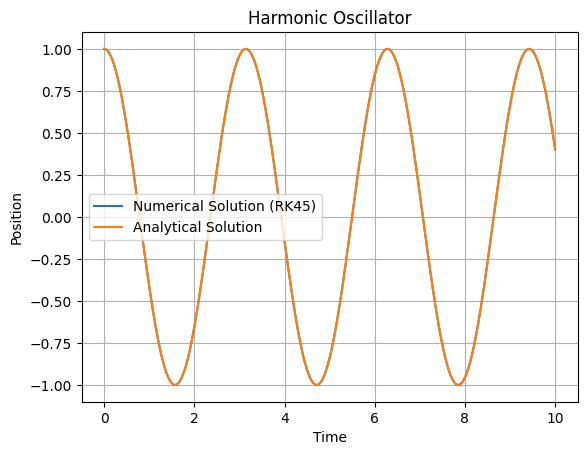

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the second-order ODE as a system of two first-order ODEs
def harmonic_oscillator(t, y, omega):
    """
    Defines the system of first-order ODEs representing the harmonic oscillator.

    Args:
        t: Time.
        y: State vector [position, velocity].
        omega: Angular frequency.

    Returns:
        Derivative of the state vector.
    """
    dydt = [y[1], -omega**2 * y[0]]
    return dydt

# Parameters
omega = 2  # Angular frequency
t_span = (0, 10) # Time interval for the simulation
y0 = [1, 0]    # Initial conditions [position, velocity]
t_eval = np.linspace(t_span[0],t_span[1],500) #Time points for evaluation


# Solve the ODE using RK45 method
sol = solve_ivp(harmonic_oscillator, t_span, y0, args=(omega,), method='RK45', dense_output=True, t_eval=t_eval)

# Extract results
t = sol.t
y = sol.y

#Analytical solution
analytical_sol = y0[0]*np.cos(omega*t)

#Plot
plt.plot(t, y[0], label='Numerical Solution (RK45)')
plt.plot(t, analytical_sol, label='Analytical Solution')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install smplotlib
import smplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 5.7 MB/s eta 0:00:00


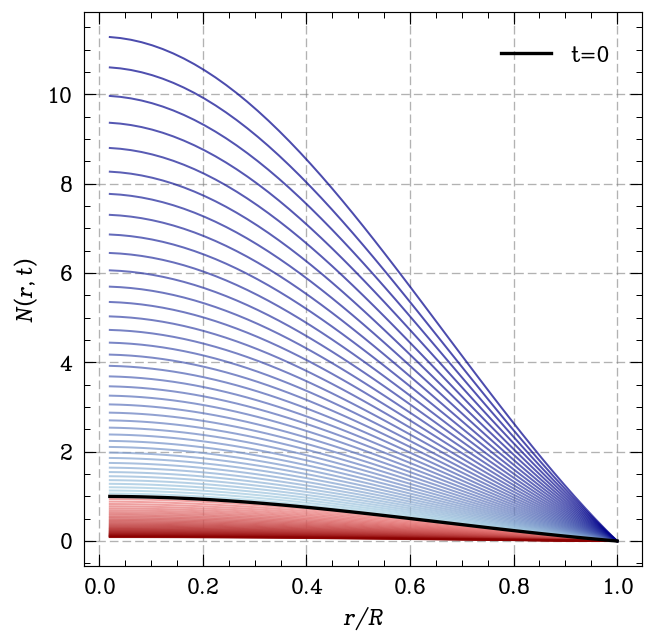

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def N(x, v, t, N0):
    return N0 * np.exp(v * t / 16.5) * (np.sin(np.pi * x) / (np.pi * x))

# Parameters
N0 = 1.0
x = np.linspace(0, 1, 50)
v_values = [-2, 2]  # Negative and positive v values
t_values = np.linspace(0, 20, 40)

red_cmap = LinearSegmentedColormap.from_list('red_cmap', ['lightcoral', 'darkred'])
blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['lightblue', 'darkblue'])

plt.figure(figsize=(6, 6))

for i, v in enumerate(v_values):
    current_cmap = blue_cmap if v > 0 else red_cmap
    t_norm = (t_values - t_values.min()) / (t_values.max() - t_values.min())
    for j, (t, color_val) in enumerate(zip(t_values, t_norm)):
        N_values = N(x, v, t, N0)
        plt.plot(x, N_values, color=current_cmap(color_val), alpha=0.7)

plt.plot(x, N(x, v_values[0], 0, N0), color="black", linewidth=2.0, label='t=0')
plt.xlabel(r'$r/R$')
plt.ylabel(r'$N(r,t)$')
plt.grid(True)
plt.legend()
plt.show()

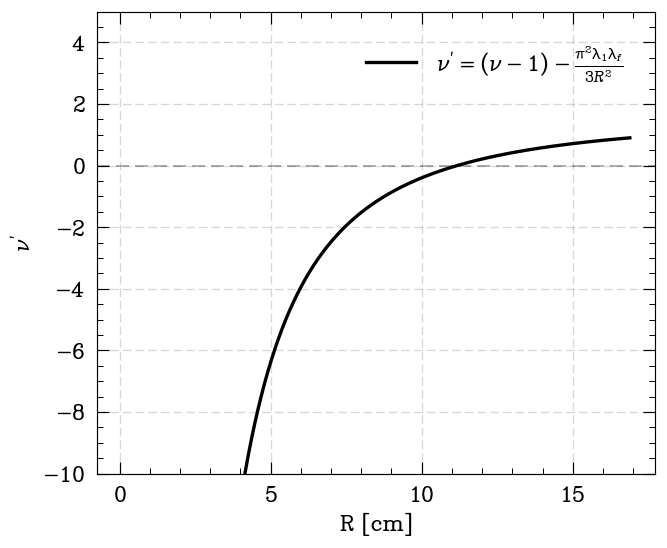

In [ ]:
def f(x):
    t = 3.596
    L = 16.89
    # f(x) = (2.6-1) - (π²(t*L))/(3x²)
    return (2.6 - 1) - (np.pi**2 * t * L)/(3 * x**2)

# Create x values, avoiding x=0
x = np.linspace(0.1, 16.89, 1000)  # Start from 0.1 to avoid division by zero

# Create the plot
plt.figure(figsize=(6,5))

# Plot the function
plt.plot(x, f(x), label=r"$\nu' = (\nu-1) - \frac{\pi^2\lambda_1\lambda_f}{3R^2}$", linewidth=2)

# Add grid and labels
plt.grid(True, alpha=0.3)
plt.xlabel('R [cm]')
plt.ylabel(r"$\nu'$")

# Add legend
plt.legend()

# Add horizontal line at y=0 to show where function crosses zero
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Adjust y-axis limits to show important features
plt.ylim(-10, 5)

# Show plot
plt.show()

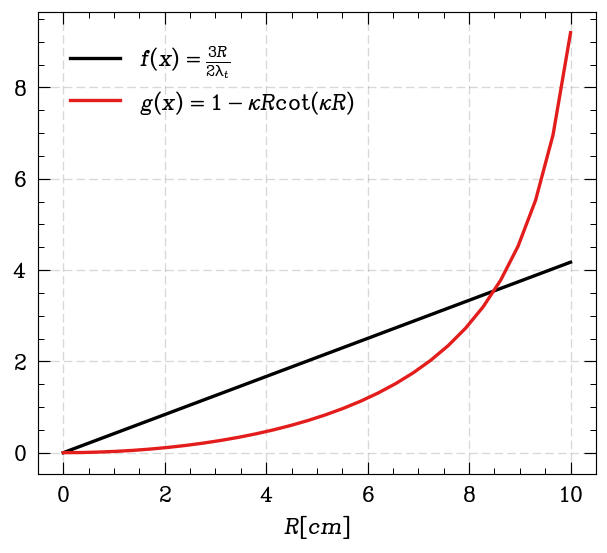

In [ ]:
# Parameters
t = 3.596
k = (3 * (2.6 - 1)/(16.89 * 3.596))**(1/2)  # ≈ 0.2811227

# Define functions
def f(x):
    return 3*x/(2*t)

def g(x):
    # Handle potential division by zero in cot(kx)
    result = np.zeros_like(x)
    nonzero_mask = (np.abs(np.sin(k*x)) > 1e-10)
    result[nonzero_mask] = 1 - k*x[nonzero_mask] * np.cos(k*x[nonzero_mask])/np.sin(k*x[nonzero_mask])
    return result

x = np.linspace(0,10, 30)
plt.figure(figsize=(6,5))

plt.plot(x, f(x), label=r'$f(x)=\frac{3R}{2\lambda _{t}}$', linewidth=2)
plt.plot(x, g(x), label=r'$g(x)=1-\kappa R\cot(\kappa R)$', linewidth=2)

# Add grid and labels
plt.grid(True, alpha=0.3)
plt.xlabel(r'$R [cm]$')
plt.ylabel('')

plt.legend()
plt.show()

In [ ]:
from sympy import Function, dsolve, Derivative, checkodesol
from sympy.abc import x
y = Function('y')
# Solve the ODE
result = dsolve(Derivative(y(x), x, x) + 9*y(x), y(x))
result

Eq(y(x), C1*sin(3*x) + C2*cos(3*x))

In [ ]:
# Check that the solution is correct
checkodesol(Derivative(y(x), x, x) + 9*y(x), result)

(True, 0)

Starting animation generation...
Animation completed in 224.62 seconds


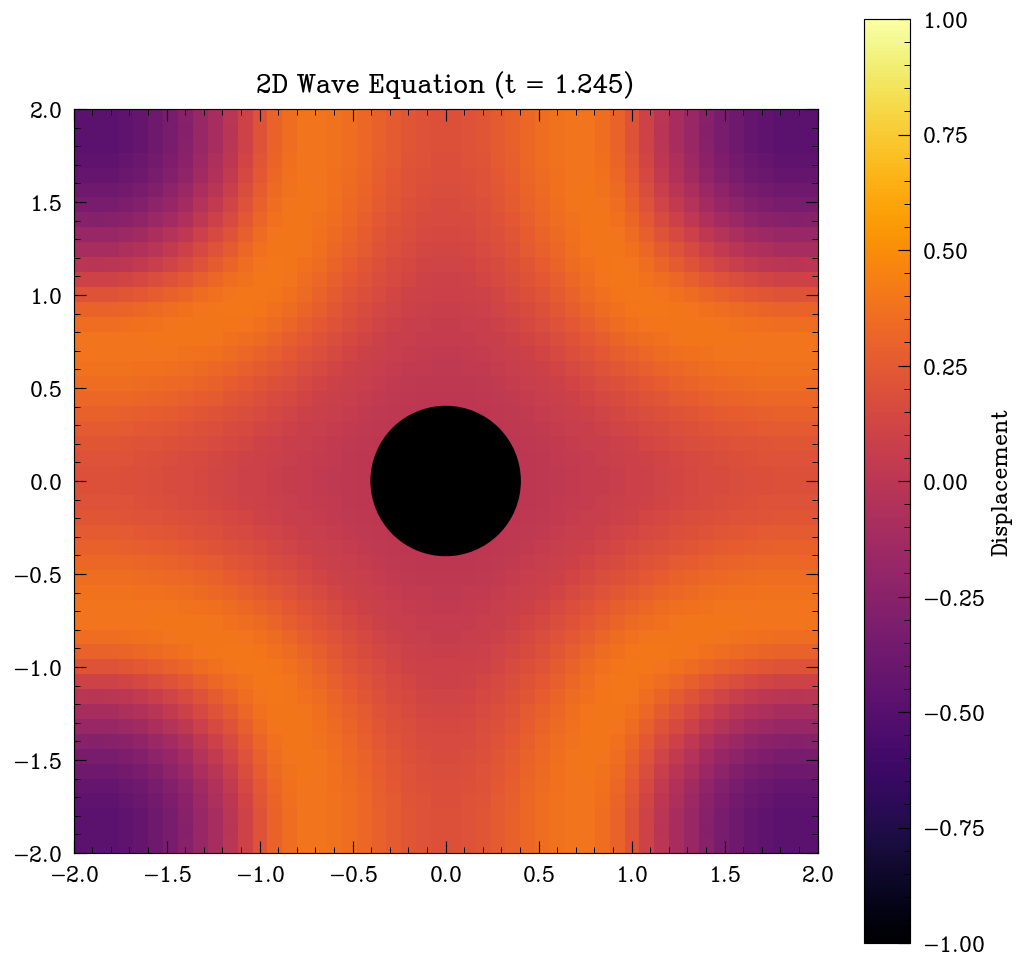

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from numba import jit
import time

nx, ny = 50, 50    # Grid size
dx = dy = 0.1      # Grid spacing
dt = 0.005         # Time step
c = 1.0            # Wave speed

dx2 = dx * dx
dy2 = dy * dy
dt2c2 = (c * dt) ** 2

# Create coordinate grids
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Initialize grids
u = np.zeros((nx, ny))      # Current state
u_prev = np.zeros((nx, ny)) # Previous state
u_next = np.zeros((nx, ny)) # Next state

# Create central obstacle (pre-computed)
sphere_radius = 0.4
sphere_mask = (X**2 + Y**2 <= sphere_radius**2)

@jit(nopython=True)
def fast_laplacian(u, dx2, dy2):
    nx, ny = u.shape
    laplacian = np.zeros_like(u)

    for i in range(1, nx-1):
        for j in range(1, ny-1):
            laplacian[i,j] = (u[i+1,j] + u[i-1,j] - 2*u[i,j]) / dx2 + \
                            (u[i,j+1] + u[i,j-1] - 2*u[i,j]) / dy2
    return laplacian

@jit(nopython=True)
def fast_boundary_conditions(u):
    nx, ny = u.shape
    u[0, :] = u[2, :]
    u[-1, :] = u[-3, :]

    u[:, 0] = u[:, 2]
    u[:, -1] = u[:, -3]

    return u

def gaussian_pulse_vectorized(X, Y, x0, y0, amplitude=2.0, width=0.5):
    """Vectorized Gaussian pulse calculation"""
    return amplitude * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * width**2))

corner_positions = [(-2,-2), (-2,2), (2,-2), (2,2)]
u = sum(gaussian_pulse_vectorized(X, Y, x0, y0) for x0, y0 in corner_positions)
u_prev = u.copy()

fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), sphere_radius, color='black')
ax.add_patch(circle)

img = ax.imshow(u, cmap='inferno', vmin=-1, vmax=1,
                extent=[-2, 2, -2, 2], origin='lower',
                interpolation='nearest')  # Added interpolation parameter
plt.colorbar(img, label='Displacement')
ax.set_title('2D Wave Equation (t = 0.000)')

def update(frame):
    global u, u_prev, u_next
    laplacian = fast_laplacian(u, dx2, dy2)
    u_next = 2*u - u_prev + dt2c2 * laplacian
    u_next = fast_boundary_conditions(u_next)
    u_next[sphere_mask] = 0
    u_prev, u = u, u_next

    img.set_array(u)
    ax.set_title(f'2D Wave Equation (t = {frame*dt:.3f})')

    return img,

@jit(nopython=True)
def simulate_frame(u, u_prev, sphere_mask, frame_number, dx2, dy2, dt2c2):
    for _ in range(frame_number + 1):
        laplacian = fast_laplacian(u, dx2, dy2)
        u_next = 2*u - u_prev + dt2c2 * laplacian
        u_next = fast_boundary_conditions(u_next)
        u_next[sphere_mask] = 0
        u_prev = u.copy()
        u = u_next.copy()
    return u, frame_number * dt

def get_frame_data(frame_number):
    u_init = sum(gaussian_pulse_vectorized(X, Y, x0, y0)
                for x0, y0 in corner_positions)
    u_prev_init = u_init.copy()

    wave_field, time = simulate_frame(u_init, u_prev_init, sphere_mask,
                                    frame_number, dx2, dy2, dt2c2)
    return wave_field, time

def plot_specific_frame(frame_number):
    wave_field, time = get_frame_data(frame_number)

    fig, ax = plt.subplots(figsize=(10, 10))
    circle = plt.Circle((0, 0), sphere_radius, color='black')
    ax.add_patch(circle)

    img = ax.imshow(wave_field, cmap='coolwarm', vmin=-1, vmax=1,
                    extent=[-2, 2, -2, 2], origin='lower',
                    interpolation='nearest')
    plt.colorbar(img, label='Displacement')
    ax.set_title(f'2D Wave Equation (t = {time:.3f})')

    plt.savefig(f'wave_2d_frame_{frame_number:04d}.png', dpi=150)
    plt.close()

    return wave_field

n_frames = 250
start_time = time.time()
print("Starting animation generation...")

anim = FuncAnimation(fig, update, frames=n_frames, interval=20, blit=True)

anim.save('wave_2d_rectangular_optimized.gif',
          writer='pillow',
          fps=30)

end_time = time.time()
print(f"Animation completed in {end_time - start_time:.2f} seconds")

# Display animation
#HTML(anim.to_jshtml())

In [ ]:
import numpy as np

def calculate_stable_dt(dx, dy, c, safety_factor=0.9):
    """
    Calculate maximum stable time step for 2D wave equation.

    Parameters:
        dx (float): Grid spacing in x direction
        dy (float): Grid spacing in y direction
        c (float): Wave speed
        safety_factor (float): Factor < 1 to ensure stability (default: 0.9)

    Returns:
        float: Maximum stable time step
        float: Actual CFL number
    """
    # Calculate maximum stable dt
    dt_max = 1 / (c * np.sqrt(1/dx**2 + 1/dy**2))

    # Apply safety factor
    dt_stable = safety_factor * dt_max

    # Calculate actual CFL number
    cfl_number = c * dt_stable * np.sqrt(1/dx**2 + 1/dy**2)

    return dt_stable, cfl_number

# Example usage with your simulation parameters
dx = dy = 0.1  # Grid spacing
c = 1.0        # Wave speed

dt_stable, cfl = calculate_stable_dt(dx, dy, c)

print(f"Grid spacing (dx, dy): {dx}, {dy}")
print(f"Wave speed (c): {c}")
print(f"Maximum stable dt: {dt_stable:.6f}")
print(f"CFL number: {cfl:.6f}")

# Compare with current dt
current_dt = 0.01
is_stable = current_dt <= dt_stable

print(f"\nCurrent dt: {current_dt}")
print(f"Is current dt stable? {'Yes' if is_stable else 'No'}")
if current_dt <= dt_stable:
    stability_margin = (dt_stable - current_dt) / dt_stable * 100
    print(f"Current dt has {stability_margin:.1f}% margin below stability limit")
else:
    excess = (current_dt - dt_stable) / dt_stable * 100
    print(f"Current dt is {excess:.1f}% above stability limit")

Grid spacing (dx, dy): 0.1, 0.1
Wave speed (c): 1.0
Maximum stable dt: 0.063640
CFL number: 0.900000

Current dt: 0.01
Is current dt stable? Yes
Current dt has 84.3% margin below stability limit


<ipython-input-5-0a2f74308f59>:26: RuntimeWarning: divide by zero encountered in divide
  r_inv = np.where(r > 1e-10, 1.0/r, 0.0)  # Safe division for r
<ipython-input-5-0a2f74308f59>:79: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  img = ax.pcolormesh(X, Y, u, cmap='inferno', vmin=-1, vmax=1, shading='auto')


Starting animation generation...
Animation completed in 45.67 seconds


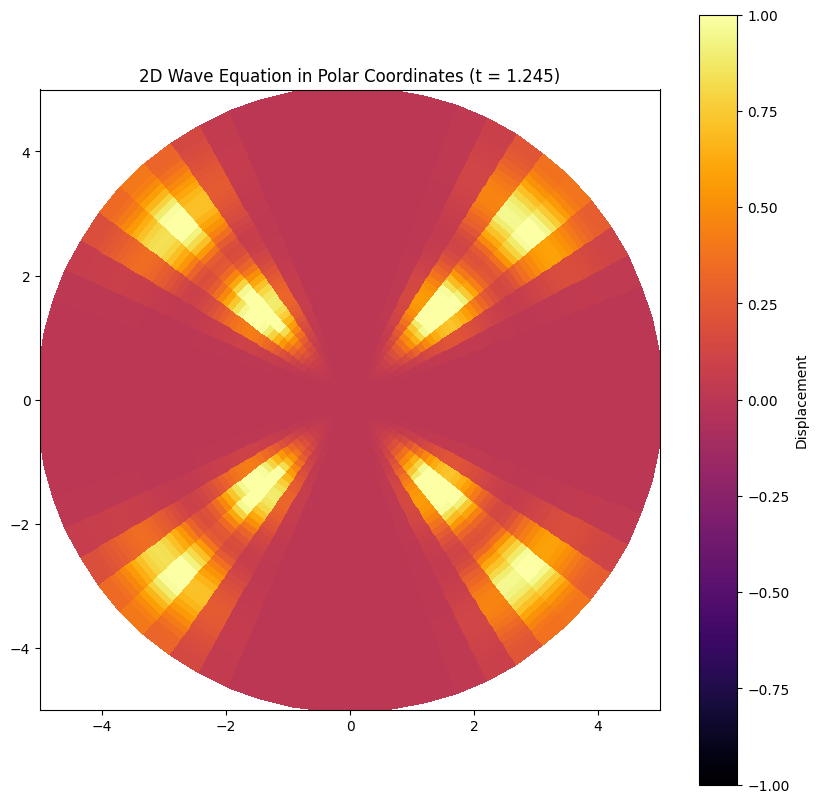

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from numba import jit
import time

nr = 50          # Number of radial points
ntheta = 60      # Number of angular points
dr = 0.1         # Radial spacing
dt = 0.005       # Time step
c = 1.5          # Wave speed
R_max = nr * dr  # Maximum radius

# Pre-compute grids
r = np.linspace(0, R_max, nr)
theta = np.linspace(0, 2*np.pi, ntheta)
R, THETA = np.meshgrid(r, theta)
X = R * np.cos(THETA)
Y = R * np.sin(THETA)

dr2 = dr * dr
dtheta2 = (2 * np.pi / ntheta) ** 2
r_inv = np.where(r > 1e-10, 1.0/r, 0.0)  # Safe division for r
r2_inv = r_inv * r_inv

u = np.zeros((ntheta, nr))
u_prev = np.zeros((ntheta, nr))
u_next = np.zeros((ntheta, nr))

obstacle_radius = 0.4
obstacle_mask = (R <= obstacle_radius)

@jit(nopython=True)
def fast_laplacian_polar(u, r_inv, r2_inv, dr2, dtheta2):
    ntheta, nr = u.shape
    result = np.zeros_like(u)

    # Interior points
    for i in range(1, nr-1):
        r_factor = r_inv[i] / (2 * dr)
        for j in range(ntheta):
            # r-component
            result[j, i] = (u[j, i+1] - 2*u[j, i] + u[j, i-1]) / dr2 + \
                          (u[j, i+1] - u[j, i-1]) * r_factor

            # θ-component
            jp1 = (j + 1) % ntheta
            jm1 = (j - 1) % ntheta
            result[j, i] += (u[jp1, i] - 2*u[j, i] + u[jm1, i]) * r2_inv[i]

    return result

def gaussian_pulse_vectorized(R, THETA, r0, theta0, amplitude=2.0, width=0.5):
    x = R * np.cos(THETA)
    y = R * np.sin(THETA)
    x0 = r0 * np.cos(theta0)
    y0 = r0 * np.sin(theta0)
    return amplitude * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * width**2))

r0 = R_max * 0.8
theta_points = [np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4]
u = sum(gaussian_pulse_vectorized(R, THETA, r0, theta0) for theta0 in theta_points)
u_prev = u.copy()

fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), obstacle_radius, color='black')
ax.add_patch(circle)

img = ax.pcolormesh(X, Y, u, cmap='inferno', vmin=-1, vmax=1, shading='auto')
plt.colorbar(img, label='Displacement')
ax.set_aspect('equal')
ax.set_xlim(-R_max, R_max)
ax.set_ylim(-R_max, R_max)
ax.set_title('2D Wave Equation in Polar Coordinates (t = 0.000)')

def apply_boundary_conditions_vectorized(u):
    """Vectorized boundary conditions"""
    u_new = u.copy()
    u_new[0, :] = u_new[-2, :]
    u_new[-1, :] = u_new[1, :]
    u_new[:, -1] = u_new[:, -2]
    u_new[:, 0] = np.mean(u_new[:, 1])
    return u_new

def update(frame):
    global u, u_prev, u_next

    # Calculate Laplacian using optimized function
    laplacian = fast_laplacian_polar(u, r_inv, r2_inv, dr2, dtheta2)

    u_next = 2*u - u_prev + (c*dt)**2 * laplacian
    u_next = apply_boundary_conditions_vectorized(u_next)
    u_next[obstacle_mask] = 0

    u_prev, u = u, u_next

    img.set_array(u.ravel())
    ax.set_title(f'2D Wave Equation in Polar Coordinates (t = {frame*dt:.3f})')

    return img,

n_frames = 250
anim = FuncAnimation(fig, update, frames=n_frames, interval=20, blit=True)

start_time = time.time()
print("Starting animation generation...")

anim.save('wave_2d_polar_optimized.gif',
          writer='pillow',
          fps=30)

end_time = time.time()
print(f"Animation completed in {end_time - start_time:.2f} seconds")

# Display animation
#HTML(anim.to_jshtml())

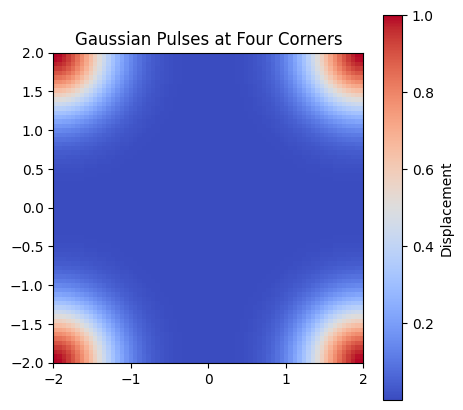

In [ ]:
# prompt: from the above code just plot the gaussians on the grid

import numpy as np
import matplotlib.pyplot as plt

# Grid parameters (same as before)
nx, ny = 70,70
dx = dy = 0.1
dt = 0.005
c = 1.0

# Initialize grid (same as before)
u = np.zeros((nx, ny))
u_prev = np.zeros((nx, ny))
u_next = np.zeros((nx, ny))

# Create coordinate grids (same as before)
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Gaussian pulse function (same as before)
def gaussian_pulse(x, y, x0, y0, amplitude=1.0, width=0.5):
    return amplitude * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * width**2))

# Add four detonation points (Gaussian pulses) -  this is where the plot is generated
plt.figure(figsize=(5,5))
plt.imshow(gaussian_pulse(X, Y, -2.0, -2.0) + gaussian_pulse(X, Y, -2.0, 2.0) + gaussian_pulse(X, Y, 2.0, -2.0) + gaussian_pulse(X, Y, 2.0, 2.0),
           extent=[-2, 2, -2, 2], origin='lower', cmap='coolwarm')
plt.colorbar(label='Displacement')
plt.title('Gaussian Pulses at Four Corners')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


nx, ny = 70, 70  # Grid size
dx = dy = 0.1    # Grid spacing
dt = 0.005       # Time step
c = 1.0          # Wave speed

# Initialize grid
u = np.zeros((nx, ny))      # Current state
u_prev = np.zeros((nx, ny)) # Previous state
u_next = np.zeros((nx, ny)) # Next state




# Create coordinate grids
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Add central sphere (as a mask)
sphere_radius = 0.2
sphere_mask = (X**2 + Y**2 <= sphere_radius**2)

# Define a Gaussian pulse function
def gaussian_pulse(x, y, x0, y0, amplitude=1.0, width=0.5):
    """
    Generate a Gaussian pulse centered at (x0, y0) with the given amplitude and width.
    """
    return amplitude * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * width**2))

# Add four detonation points (Gaussian pulses) at the corners of the grid
u += gaussian_pulse(X, Y, -2.0, -2.0)
u += gaussian_pulse(X, Y, -2.0, 2.0)
u += gaussian_pulse(X, Y, 2.0, -2.0)
u += gaussian_pulse(X, Y, 2.0, 2.0)

# Make a copy of the initial state for the previous state
u_prev = u.copy()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), 0.4, color='black')
ax.add_patch(circle)
plt.close()  # Prevent display of static plot

# Initial plot
contour = ax.contour(X, Y, u, levels=10, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)
ax.set_title('2D Wave Equation (t = 0.000)')

def update(frame):
    global u, u_prev, u_next

    # Calculate Laplacian using finite differences
    laplacian = (np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
                 np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4*u) / (dx*dy)

    # Update wave equation
    u_next = 2*u - u_prev + (c*dt)**2 * laplacian

    # Apply sphere boundary condition
    u_next[sphere_mask] = 0

    # Update states
    u_prev = u.copy()
    u = u_next.copy()

    # Update plot
    ax.clear()
    circle = plt.Circle((0, 0), 0.4, color='black')
    ax.add_patch(circle)
    contour = ax.contour(X, Y, u, levels=10, cmap='viridis')
    ax.clabel(contour, inline=True, fontsize=8)
    ax.set_title(f'2D Wave Equation (t = {frame*dt:.3f})')

    return contour.collections

# Create animation
anim = FuncAnimation(fig, update, frames=300, interval=20, blit=True)

# Display animation in notebook
HTML(anim.to_jshtml())

# Save animation
anim.save('wave_2d_contour.gif', writer='pillow', fps=30)

<ipython-input-10-dbbfe7c63686>:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return contour.collections
<ipython-input-10-dbbfe7c63686>:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return contour.collections
<ipython-input-10-dbbfe7c63686>:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return contour.collections


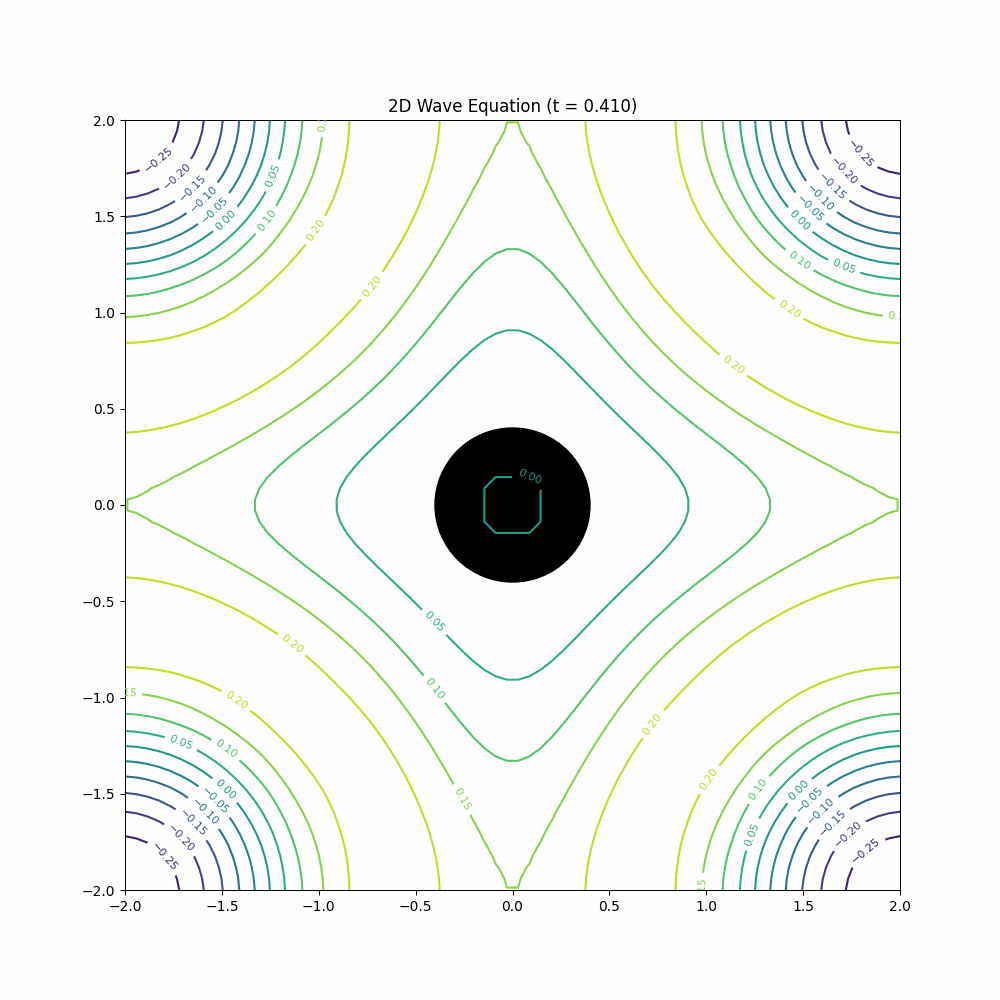